# Notebook 2: MLP model

In [1]:
#When running this code on colabratory, put this boolean to True. Else, put it to False
colabratory = True

if colabratory == True:
  #allow access to files
  from google.colab import drive
  drive.mount('/content/gdrive')

  #install missing packages
  !pip install aidapy
  !pip install h5netcdf

  #travel to correct directory
  %cd gdrive/MyDrive/Space-Weather_Project/version_300521/

Mounted at /content/gdrive
     |████████████████████████████████| 81kB 6.2MB/s 
     |████████████████████████████████| 184kB 26.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.1MB 20.3MB/s 
     |████████████████████████████████| 931kB 22.2MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3MB 30.5MB/s 
     |████████████████████████████████| 296kB 37.7MB/s 
     |████████████████████████████████| 143kB 39.4MB/s 
  Created wheel for heliopy: filename=HelioPy-0.15.3-cp37-none-any.whl size=82650 sha256=59db9fbe629966a6d15fbeac4388bcb7e4c982771afe82166d3682f16abd5e52
  Stored in directory: /root/.cache/pip/wheels/10/61/cd/11367c01433d89f39db4b5eddda92ecf640766ee737bfef5ba
  Created wheel 

In [2]:
import json
import sklearn.metrics

In [3]:
%run notebook_setup.py

Creating download directory /root/heliopy/data


In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
print(keras.__version__)

2.5.0


In [ ]:
print(sklearn.__version__)

0.22.2.post1


In [ ]:
!pip freeze > requirements.txt

## Data

In [4]:
ml_method = 'mlp'
data_version = 'mms1_samp_4dot5s' 
data_process = 'no_flux_shuffle' #_znorm' 
period = '2016_2018'

x_train, y_train, x_test, y_test, x_val, y_val = l_tools.generate_train_test(
    ml_method, 
    data_version, 
    data_process, 
    period)

In [ ]:
print(association)

{0: 'sw', 1: 'fs', 2: 'bs', 3: 'msh', 4: 'mp', 5: 'bl', 6: 'msp', 7: 'ps', 8: 'psbl', 9: 'lobe'}


Convert y data to categorical:

In [5]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat  = keras.utils.to_categorical(y_test)
y_val_cat   = keras.utils.to_categorical(y_val)


print('>> TRAINING DATASET \t',
      x_train.shape,'\t\t',
      y_train.shape,'\t',
      y_train_cat.shape)
print('>> VALIDATION DATASET \t',
      x_val.shape,'\t\t',
      y_val.shape,'\t',
      y_val_cat.shape)
print('>> TEST DATASET \t',
      x_test.shape,'\t\t',
      y_test.shape,'\t',
      y_test_cat.shape)

>> TRAINING DATASET 	 (748761, 12) 		 (748761,) 	 (748761, 10)
>> VALIDATION DATASET 	 (249588, 12) 		 (249588,) 	 (249588, 10)
>> TEST DATASET 	 (332784, 12) 		 (332784,) 	 (332784, 10)


Check for nans:

In [ ]:
print("Do train sets have Nans?")
print("X: " + str(np.any(np.isnan(x_train))))
print("Y: " + str(np.any(np.isnan(y_train))))
print("Y-cat: " + str(np.any(np.isnan(y_train_cat))))
print("Do validation sets have Nans?")
print("X: " + str(np.any(np.isnan(x_val))))
print("Y: " + str(np.any(np.isnan(y_val))))
print("Y-cat: " + str(np.any(np.isnan(y_val_cat))))
print("Do test sets have Nans?")
print("X: " + str(np.any(np.isnan(x_test))))
print("Y: " + str(np.any(np.isnan(y_test))))
print("Y-cat: " + str(np.any(np.isnan(y_test_cat))))

Do train sets have Nans?
X: False
Y: False
Y-cat: False
Do validation sets have Nans?
X: False
Y: False
Y-cat: False
Do test sets have Nans?
X: False
Y: False
Y-cat: False


Plot histograms of data:

(array([21277., 47619., 21156., 41481., 33369., 44303., 46353., 35432.,
        26645., 15149.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

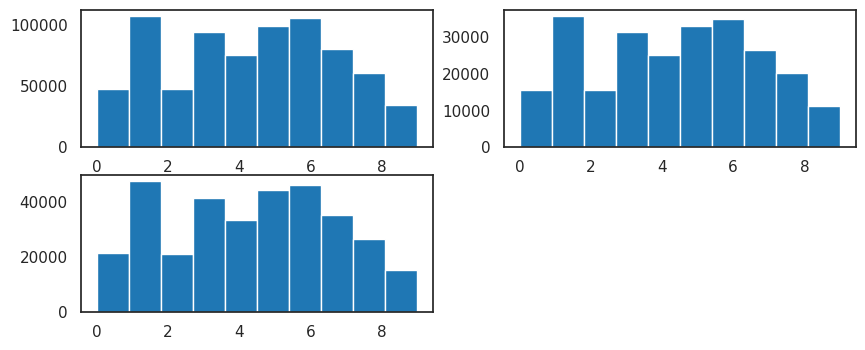

In [ ]:
#histograms for y train/val/test
plt.figure(num=1, figsize=(10,4))

plt.subplot(221)
plt.hist(y_train)
plt.subplot(222)
plt.hist(y_val)
plt.subplot(223)
plt.hist(y_test)

Check mins and maxes:

In [ ]:
#min and max of datasets
np.min(x_train), np.max(x_train), \
np.min(x_val),   np.max(x_val), \
np.min(x_test),  np.max(x_test),\
np.min(y_train_cat), np.max(y_train_cat), \
np.min(y_val_cat),   np.max(y_val_cat), \
np.min(y_test_cat),  np.max(y_test_cat)

(-1039.3299560546875,
 15719.703125,
 -980.8472900390625,
 14417.646484375,
 -950.3854370117188,
 14518.9609375,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0)

## Load stored example model

In [ ]:
example_model = keras.models.load_model('./trained_model/mlp/trained_model.hdf5')
example_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1664      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

In [ ]:
#example_model.layers[1].rate, example_model.layers[4].rate, example_model.layers[7].rate
example_model.layers[2].activation, example_model.layers[5].activation, example_model.layers[8].activation

NameError: ignored

## 1 - reproduce MLP model locally

#using sequential
'''
model = None
inputshape = (12,)
drop_frac = 0.01


model = keras.Sequential()

model.add(layers.Dense(128,input_shape=inputshape))
model.add(layers.Dropout(rate=drop_frac))
model.add(tf.keras.layers.Activation('relu'))  

model.add(layers.Dense(128))
model.add(layers.Dropout(rate=drop_frac))
model.add(tf.keras.layers.Activation('relu')) 

model.add(layers.Dense(128))
model.add(layers.Dropout(rate=drop_frac))
model.add(tf.keras.layers.Activation('relu'))   

model.add(layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))  

model.summary()
'''

In [6]:
#not using sequential
model = None
inputshape = (12,)

## Parameters
drop_frac = 0.01
nb_layers = 3
batch_norm = True
n_units = 128
m_activation = 'relu'


## Architecture
inputs = keras.Input(shape=inputshape)

x_layer = inputs
for i in range(nb_layers):
    x_layer  = layers.Dense(n_units)(x_layer) 
    
    if batch_norm:
        x_layer  = layers.BatchNormalization() (x_layer)
    
    if drop_frac>0.:
        x_layer  = layers.Dropout(drop_frac)(x_layer)
    
    x_layer = layers.Activation(m_activation) (x_layer)

outputs = layers.Dense(10, activation = 'softmax')(x_layer)

## Model
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512   

### Load existing custom model

In [ ]:
saved_model = keras.models.load_model('./results/mlp_run_01-06-2021_batchnorm_dropfrac/model.h5')
saved_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512   

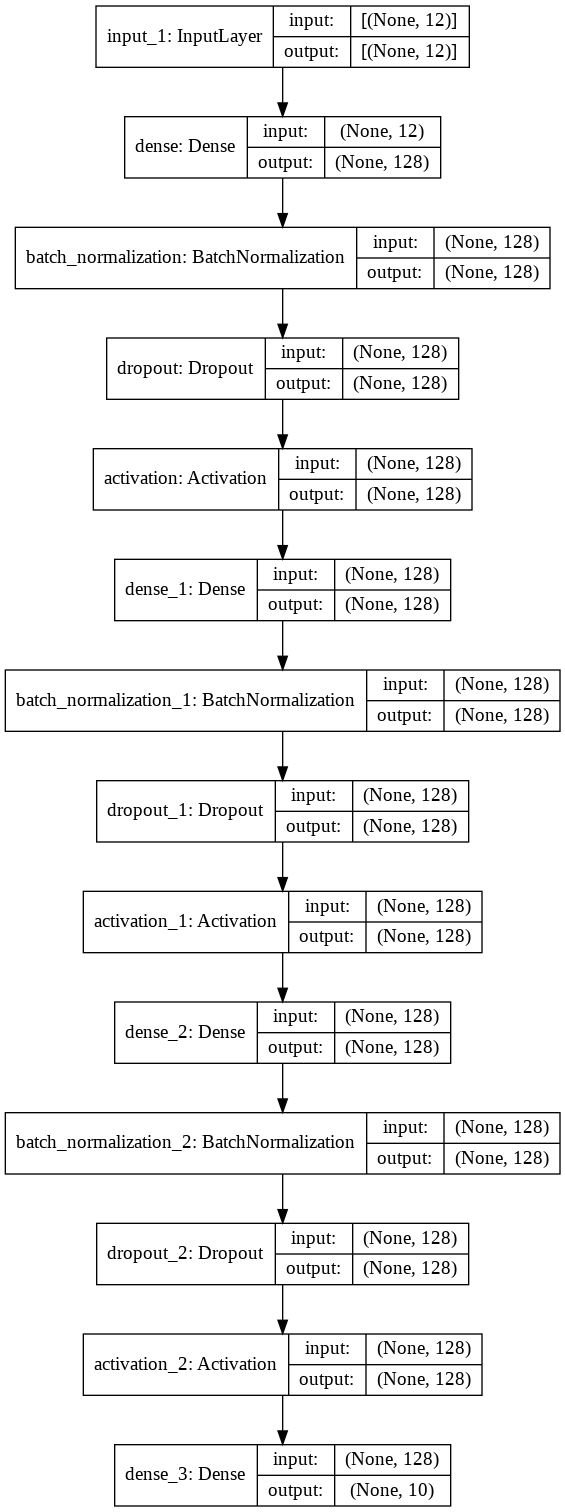

In [ ]:
keras.utils.plot_model(saved_model,to_file='./MLP_model.png',show_shapes=True)

## 2- Compile MLP model

Compile model using Adam optimizer , categorical crossentropy loss function and loss,accuracy metrics

In [7]:
#loss = 'categorical_crossentropy'
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
lr = 0.0001
opt = tf.keras.optimizers.Adam(learning_rate=lr)

In [8]:
use_existing = False
#compile saved model
if use_existing == True:
    saved_model.compile(optimizer=opt,
                        loss=loss,
                        metrics= ['accuracy'])
else:
    #compile new model
    model.compile(optimizer=opt,
                  loss=loss,
                  metrics= ['accuracy'])

## 3 -  Train MLP model

Train model:

In [9]:
import datetime

m_dateformat = '%d-%m-%Y'
m_date = datetime.datetime.now().strftime(m_dateformat)
model_run_name = 'mlp_run_'+m_date

if batch_norm:
    model_run_name+='_batchnorm'
    
if drop_frac:
    model_run_name+='_dropfrac'
    
print(model_run_name)

log_dir = './results/' + model_run_name
if os.path.exists(log_dir)==False:
    os.makedirs(log_dir)


weights_path = os.path.join(log_dir, 'weights.h5')
model_path   = os.path.join(log_dir, 'model.h5')
history_path = os.path.join(log_dir, 'history.h5')

mlp_run_10-06-2021_batchnorm_dropfrac


In [10]:
#run settings
nepochs   = 100
batchsize = 64
patience  = 20

In [11]:
callbacks = [TensorBoard(log_dir=log_dir,write_graph=True),
             #
             CSVLogger(os.path.join(log_dir,'training.csv')),
             #
             EarlyStopping(patience=patience), 
             #
             ModelCheckpoint(weights_path, 
                             save_weights_only = True, 
                             save_best_only = True, 
                             verbose = False),
            ]

callbacks

In [12]:
history = model.fit(x = x_train, 
                    y = y_train_cat, 
                    validation_data = (x_val, y_val_cat),
                    #
                    batch_size = batchsize, 
                    epochs = nepochs, 
                    #
                    callbacks = callbacks,
                    verbose = 2
                    #shuffle=True,
                    )

model.save(model_path)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


11700/11700 - 70s - loss: 0.7772 - accuracy: 0.7140 - val_loss: 0.6247 - val_accuracy: 0.7663
Epoch 2/100
11700/11700 - 64s - loss: 0.6344 - accuracy: 0.7660 - val_loss: 0.5871 - val_accuracy: 0.7795
Epoch 3/100
11700/11700 - 63s - loss: 0.5923 - accuracy: 0.7800 - val_loss: 0.5233 - val_accuracy: 0.8062
Epoch 4/100


KeyboardInterrupt: ignored

## Display loss & accuracy

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


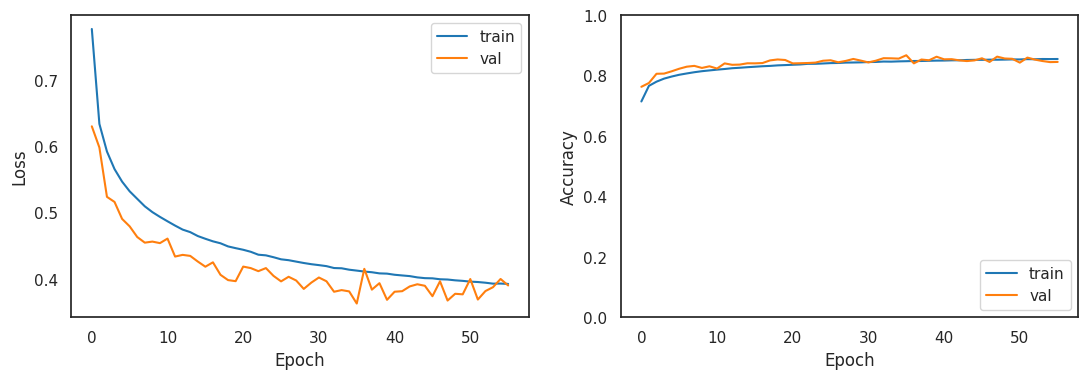

In [ ]:
plt.close('all')
plt.figure(num=1, figsize=(13, 4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
#plt.grid('on')


plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.0, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
#plt.grid('on')

In [ ]:
"""
# to open tensorboard, on terminal pinpoint to the result folder for the current runs:
    tensorboard --logdir=./results/

#On web browser:
    http://localhost:6006/
"""

'\n# to open tensorboard, on terminal pinpoint to the result folder for the current runs:\n    tensorboard --logdir=./results/\n\n#On web browser:\n    http://localhost:6006/\n'

## Display Confusion matrices

In [ ]:
use_existing = True
def convert_from_categorical(y_categorical):
    y_categorical = y_categorical / np.sum(y_categorical, axis=1).reshape((-1,1))
    y = np.argmax(y_categorical, axis=1)
    #edited to also return the score (Lukas)
    return y, y_categorical
if use_existing != True:
  y_pred_cat = model.predict(x_test)
# or saved: 
else:
  y_pred_cat = saved_model.predict(x_test)


#edited to also assign the score (Lukas)
y_pred,y_score = convert_from_categorical(y_pred_cat)

In [ ]:
cf_matrix_cnt = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=m_classnames_id)

temporary_vector = cf_matrix_cnt.sum(axis=1).astype("float"); 
temporary_vector[temporary_vector==0]=np.nan
cf_matrix = cf_matrix_cnt.astype("float")/temporary_vector[:,np.newaxis]


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


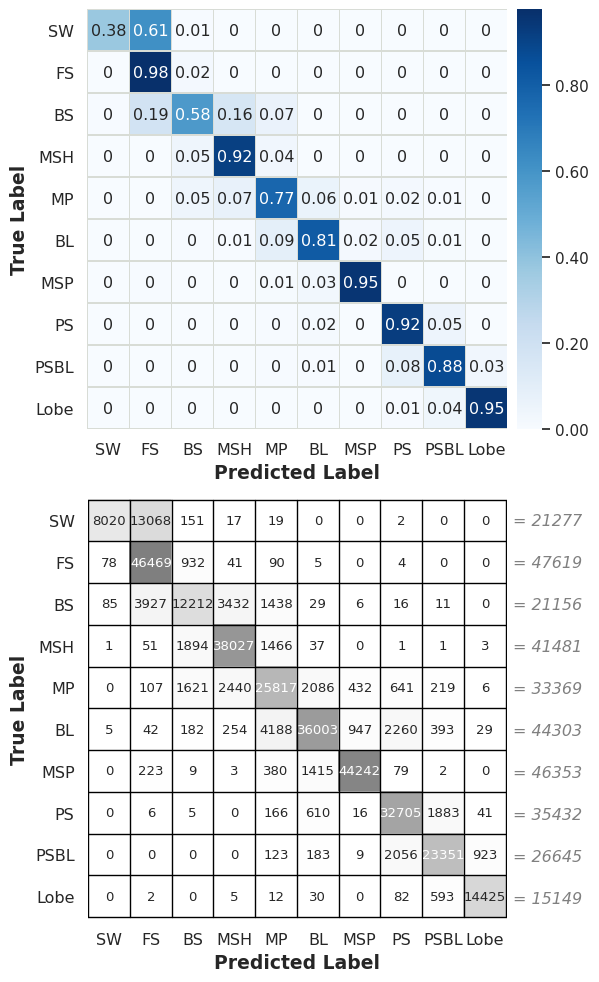

In [ ]:
plt.close('all')
plot_conf_mat(cf_matrix_cnt, cf_matrix, m_classnames, txt_size=11.5)
#manual save required

## Display individual histograms

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

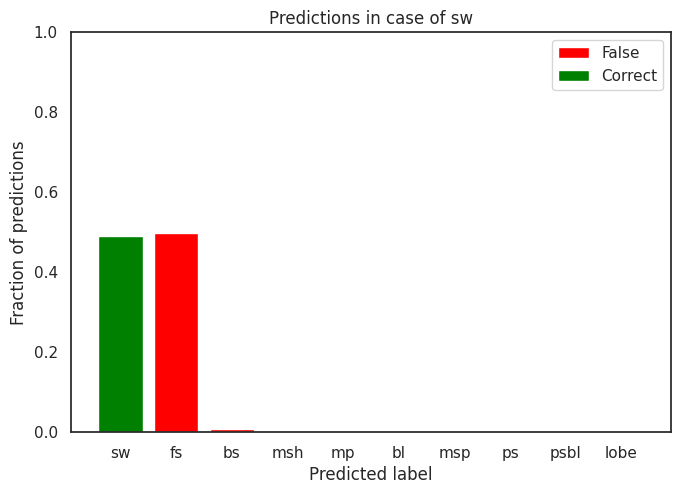

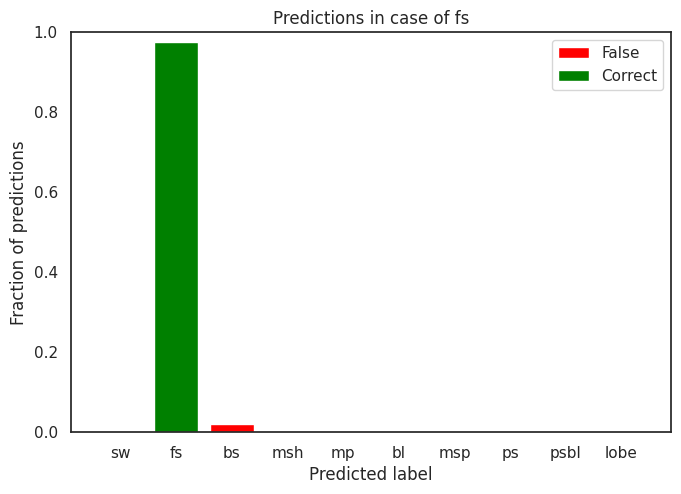

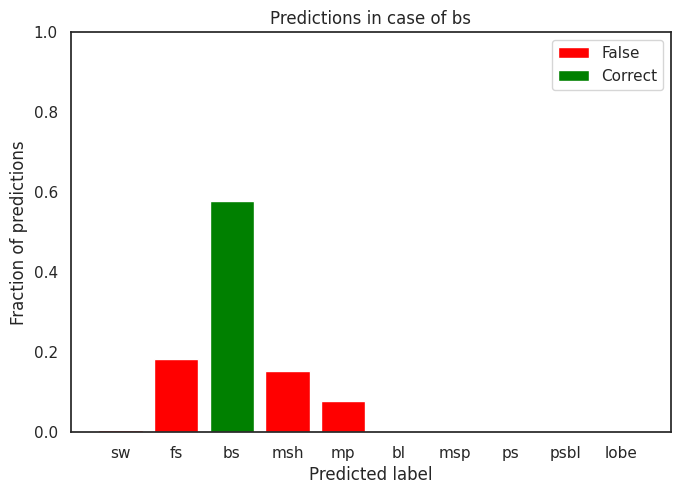

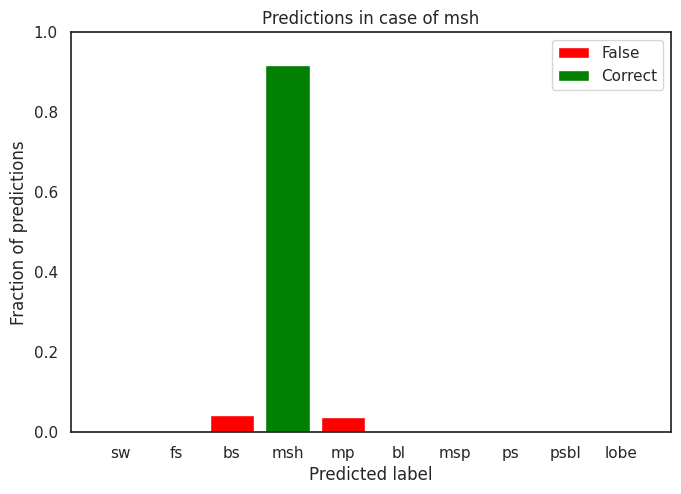

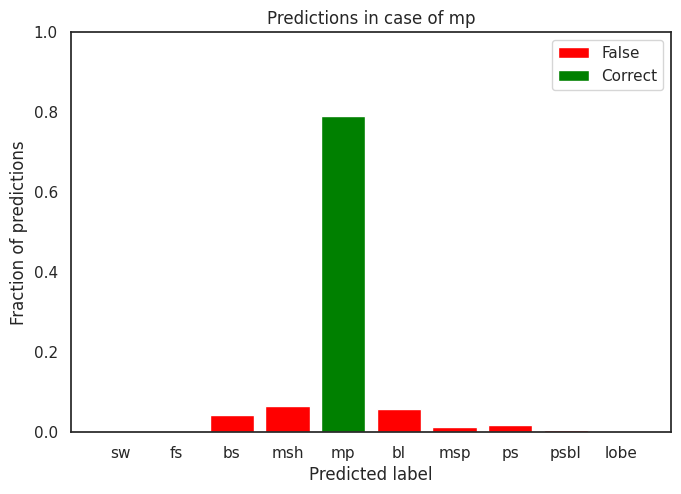

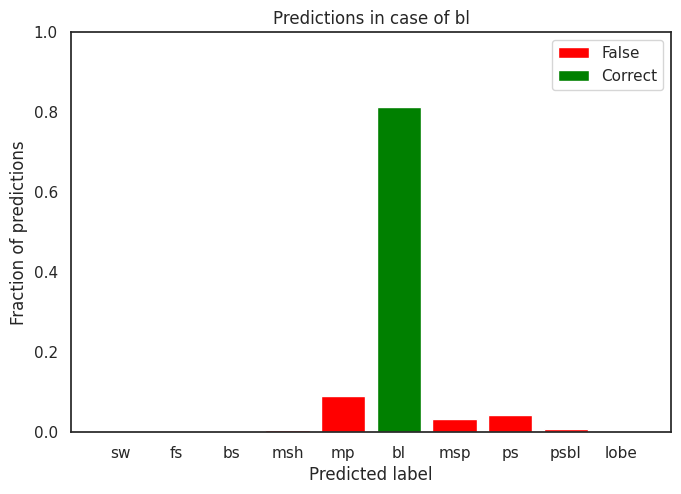

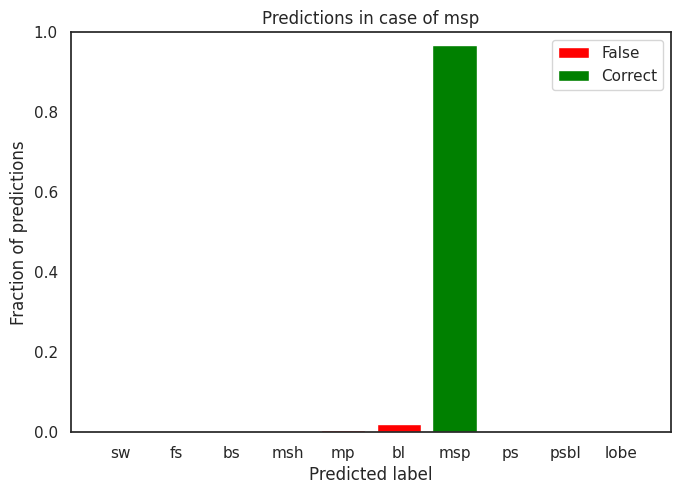

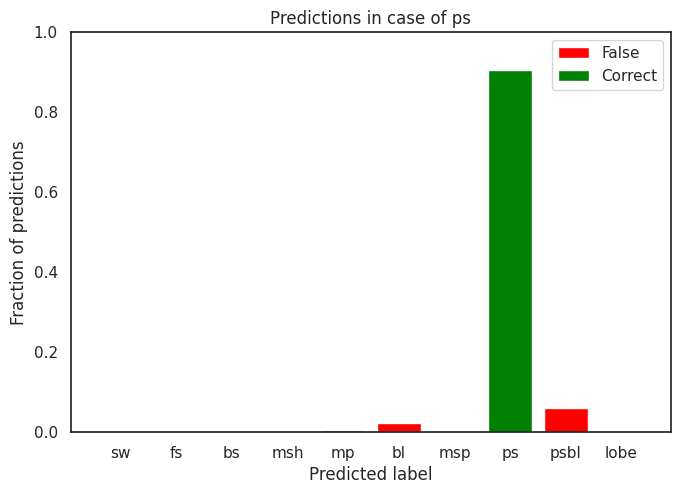

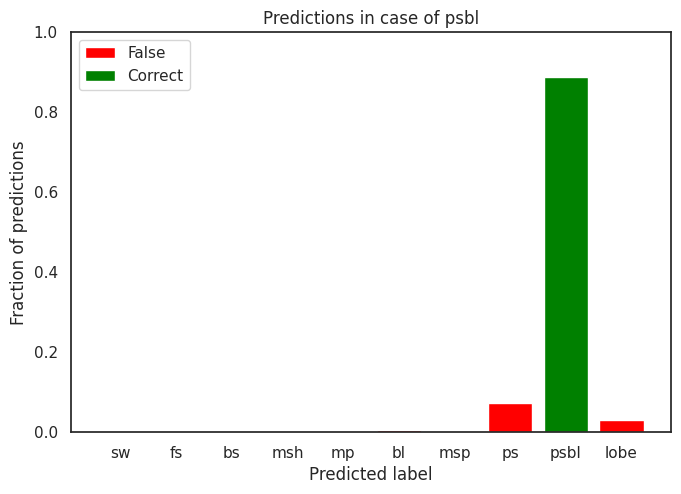

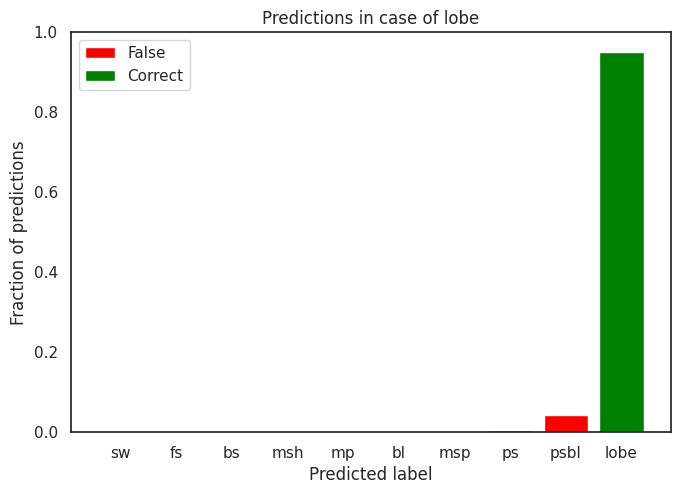

In [ ]:
fig_bar=np.zeros(10)
if not os.path.isdir(os.path.join(log_dir,'figures')):
    os.makedirs(os.path.join(log_dir,'figures'))
if not os.path.isdir(os.path.join(log_dir,os.path.join('figures','histograms'))):
    os.makedirs(os.path.join(log_dir,os.path.join('figures','histograms')))
for i in range(0,10):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Predictions in case of '+ association[i])
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Fraction of predictions')
    ax.bar(range(0,10),cf_matrix[i],color='r')
    ax.bar(i,cf_matrix[i][i],color='g')
    ax.legend(['False','Correct'])
    ax.set_xticks(range(0,10,1))
    ax.set_xticklabels(association.values())
    ax.set_ylim((0,1))
    plt.savefig(os.path.join(log_dir,'figures/histograms/hist_'+association[i]+'.eps'),format='eps')

## Display classification report

In [ ]:
report = sklearn.metrics.classification_report(y_test, y_pred)
print(report)
if not os.path.isdir(os.path.join(log_dir,'figures')):
    os.makedirs(os.path.join(log_dir,'figures'))
with open(os.path.join(log_dir,'figures/class_report.txt'), 'w') as f:
    print(report, file=f) 

              precision    recall  f1-score   support

         0.0       0.98      0.38      0.54     21277
         1.0       0.73      0.98      0.83     47619
         2.0       0.72      0.58      0.64     21156
         3.0       0.86      0.92      0.89     41481
         4.0       0.77      0.77      0.77     33369
         5.0       0.89      0.81      0.85     44303
         6.0       0.97      0.95      0.96     46353
         7.0       0.86      0.92      0.89     35432
         8.0       0.88      0.88      0.88     26645
         9.0       0.94      0.95      0.94     15149

    accuracy                           0.85    332784
   macro avg       0.86      0.81      0.82    332784
weighted avg       0.86      0.85      0.84    332784



## Display ROC curves

n_classes 10


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


AUC macro average :0.9895348441336467
AUC micro average :0.990926330206577


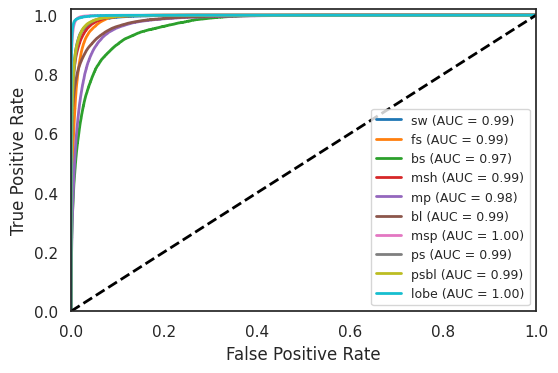

In [ ]:
fig_ROC = l_tools.roc_plot(y_score, y_test, association=association)
if not os.path.isdir(os.path.join(log_dir,'figures')):
    os.makedirs(os.path.join(log_dir,'figures'))
plt.savefig(os.path.join(log_dir,'figures/ROC.eps'),format='eps')
plt.show()